## Bulldozers with Random forests

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
PATH = "data\\bulldozers\\"

In [40]:
from ml_helpers.imports import *
from ml_helpers.df import *
from ml_helpers.engineering import *
from ml_helpers.manipulation import *
from ml_helpers.visualization import *
from ml_helpers.rf import *

In [4]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=["saledate"])

In [5]:
display_all(df_raw.describe(include='all'))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3919,4999,1950,175,122,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2009-02-16 00:00:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33985,1932,5039,19798,43235,13202,15875,62274,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
display_all(df_raw.describe(include='all'))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3919,4999,1950,175,122,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2009-02-16 00:00:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33985,1932,5039,19798,43235,13202,15875,62274,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What metric to use?
Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.
- we need to transform SalePrice to log scale

In [7]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### Fitting the RF model
Sklearn's random forest can only work with numerical values. We need to do some feature engineering:
- transform strings to categorical variables (- should they be ordinal?)
- transform dates into meaningful set of features
- deal with NaNs - fill with mean value, introduce boolean _na column

In [8]:
add_datepart(df_raw, 'saledate')
df_raw.saleIs_month_end.head()

0    False
1    False
2    False
3    False
4    False
Name: saleIs_month_end, dtype: bool

In [9]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [10]:
to_categorical(df_raw)
numericalize_all(df_raw)

Display missing columns

In [11]:
display_all((df_raw.isnull().sum().sort_index()/len(df_raw)).sort_values(ascending=False))

MachineHoursCurrentMeter    0.644089
auctioneerID                0.050199
state                       0.000000
Scarifier                   0.000000
SalesID                     0.000000
SalePrice                   0.000000
Ripper                      0.000000
Ride_Control                0.000000
Pushblock                   0.000000
ProductSize                 0.000000
ProductGroupDesc            0.000000
ProductGroup                0.000000
Pattern_Changer             0.000000
Pad_Type                    0.000000
ModelID                     0.000000
MachineID                   0.000000
Hydraulics_Flow             0.000000
Stick                       0.000000
Hydraulics                  0.000000
Grouser_Type                0.000000
Grouser_Tracks              0.000000
Forks                       0.000000
Engine_Horsepower           0.000000
Enclosure_Type              0.000000
Enclosure                   0.000000
Drive_System                0.000000
Differential_Type           0.000000
C

In [12]:
fill_all_missing(df_raw)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,950,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1725,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,331,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,1,3674,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,3,4208,...,204,False,False,False,False,False,False,1248307200,False,False
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,493,...,353,False,False,False,False,False,False,1229558400,False,False
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,1,1453,...,239,False,False,False,False,False,False,1093478400,False,False
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,1,740,...,321,False,False,False,False,False,False,1132185600,False,False
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,779,...,239,False,False,False,False,False,False,1251331200,False,False
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,3,1771,...,221,False,False,False,False,False,False,1186617600,False,False


In [13]:
y = df_raw.SalePrice
df_raw.drop('SalePrice', axis=1, inplace=True)

Get percentage of missing values per column

In [14]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw, y)
m.score(df_raw, y)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9829982150328618

RandomForestRegressor's .score() returns r^2 - how much variance of the training set was explained by the model. Am i doing good? Only one way to find out - introduce validation dataset

In [15]:
df_raw.size

26474250

Note: Data is not shuffled on purpose - this dataset has a time element = the test set provided by kaggle has all dates later (we're trying to predict prices in the future) - we want to kind of replicate this with our validation dataset, so randomly shuffling it would make it easier and will lead to inaccurate predictions.

In [16]:
valid_size = 12000
train_size = len(df_raw) - valid_size
X_train, X_valid = split_dataset(df_raw, train_size)
y_train, y_valid = split_dataset(y, train_size)

X_train.shape, X_valid.shape

((389125, 66), (12000, 66))

In [17]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
          m.score(X_train, y_train), m.score(X_valid, y_valid)]
    return res

m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 39.9 s


[0.09050080690614154,
 0.24702107471199627,
 0.9828825239505402,
 0.8910277325231203]

Get a better understanding about what's going on using just a single tree

In [18]:
tree = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time tree.fit(X_train, y_train)
print_score(tree)

Wall time: 3.53 s


[0.5371269683342214,
 0.5674541015387405,
 0.3970396664995464,
 0.42494490873715673]

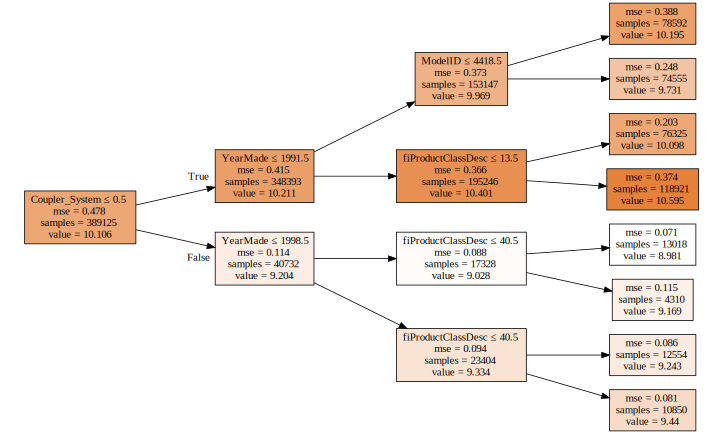

In [22]:
draw_tree(tree.estimators_[0], X_train, precision=3)

Check out the decision of individual trees, their average and how does it compare to the prediction.

In [37]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), np.array(y_valid)[0]

(array([8.93590353, 9.32812341, 8.98719682, 9.21034037, 9.21034037,
        9.02401079, 9.15904708, 9.01796848, 9.21034037, 9.13237883]),
 9.121565005170604,
 9.104979856318357)

#### Validation without validation set - OOB (Out-of-bag) score
Not all the rows are used in training a specific tree. Idea: How each row, calculate its error on a tree that didn't use that row in training.

In [41]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)
print(f"{m.oob_score_}")

Wall time: 2min 26s


0.9085283905594417

#### Subsampling - reduce overfitting and speed up the computation
There are a lot of rows so .fit() takes a long time. I don't want to just take a portion of training dataset: let's instead limit our model to a different random subset per tree. 
- realistically, some datasets are so big there's no way i'd fit a RF to them
- there's not an easy way to do it, sklearn's API has to be played with, encapsulated in a function

In [42]:
set_rf_samples(20000)
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 22.2 s


[0.22675819131817332,
 0.26440844756965454,
 0.8925365461290844,
 0.8751471022288206]

In [43]:
reset_rf_samples()

### Hyperparameter optimization
- min_samples_leaf=3 - stop training the tree when my leaf node has 3 or less samples in them
- max_features=0.5 - the less correlated trees, the better. At every single split point, take different columns. This number specifies the proportion of features randomly selected for each split

In [44]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print(f"{m.oob_score_}")

Wall time: 1min 6s
0.9115963719194763


In [45]:
print_score(m)

[0.11907712005141496,
 0.22701965279294778,
 0.970365918498697,
 0.9079603657401603]